In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
# from datetime import datetime, timedelta

In [2]:
tickers_codes = pd.read_csv("../sp500query.csv")
tickers_codes

,GVKEY,LPERMNO,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,tic,...,curcdq,datacqtr,datafqtr,costat,ggroup,gind,gsector,gsubind,naics,sic
0,1045,21020,2020-06-30,2020,2,INDL,C,D,STD,AAL,...,USD,2020Q2,2020Q2,A,2030,203020,20,20302010,481111,4512
1,1045,21020,2020-09-30,2020,3,INDL,C,D,STD,AAL,...,USD,2020Q3,2020Q3,A,2030,203020,20,20302010,481111,4512
2,1045,21020,2020-12-31,2020,4,INDL,C,D,STD,AAL,...,USD,2020Q4,2020Q4,A,2030,203020,20,20302010,481111,4512
3,1045,21020,2021-03-31,2021,1,INDL,C,D,STD,AAL,...,USD,2021Q1,2021Q1,A,2030,203020,20,20302010,481111,4512
4,1045,21020,2021-06-30,2021,2,INDL,C,D,STD,AAL,...,USD,2021Q2,2021Q2,A,2030,203020,20,20302010,481111,4512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7307,316056,14297,2022-09-30,2022,3,INDL,C,D,STD,ALLE,...,USD,2022Q3,2022Q3,A,2010,201020,20,20102010,332510,3420
7308,316056,14297,2022-12-31,2022,4,INDL,C,D,STD,ALLE,...,USD,2022Q4,2022Q4,A,2010,201020,20,20102010,332510,3420
7309,316056,14297,2023-03-31,2023,1,INDL,C,D,STD,ALLE,...,USD,2023Q1,2023Q1,A,2010,201020,20,20102010,332510,3420
7310,316056,14297,2023-06-30,2023,2,INDL,C,D,STD,ALLE,...,USD,2023Q2,2023Q2,A,2010,201020,20,20102010,332510,3420


In [3]:
selected_fields = ["datadate", "tic", "gsector", "naics", "sic"]
tickers_codes[selected_fields][tickers_codes["tic"]=="AAPL"]

,datadate,tic,gsector,naics,sic
232,2020-06-30,AAPL,45,334220,3663
233,2020-09-30,AAPL,45,334220,3663
234,2020-12-31,AAPL,45,334220,3663
235,2021-03-31,AAPL,45,334220,3663
236,2021-06-30,AAPL,45,334220,3663
237,2021-09-30,AAPL,45,334220,3663
238,2021-12-31,AAPL,45,334220,3663
239,2022-03-31,AAPL,45,334220,3663
240,2022-06-30,AAPL,45,334220,3663
241,2022-09-30,AAPL,45,334220,3663


In [4]:
date = "2022-01-31"

In [6]:
# np.unique(tickers_codes[tickers_codes['tic'] == tickers_codes['tic'].unique()[0]]["naics"])

In [7]:
import pandas as pd

# Assuming your DataFrame is named 'tickers_codes'
# Replace 'naic' and 'tic' with your actual column names

# Sort the DataFrame by 'tic' and 'date'
tickers_codes = tickers_codes.sort_values(by=['tic', 'datadate'])

# Initialize an empty list to store tickers with changed NAICS codes
tickers_with_changes = []

# Iterate through unique tickers
for ticker in tickers_codes['tic'].unique():
    # Filter the DataFrame for the specific ticker
    ticker_data = tickers_codes[tickers_codes['tic'] == ticker]
    
    # Check if there are changes in the 'naic' column for the ticker
    # print(np.unique(ticker_data['naics']))
    if len(np.unique(ticker_data["naics"])) > 1:
        
    # if any(ticker_data['naics'].diff().ne(0)):
        tickers_with_changes.append(ticker)

# Display the list of tickers with changed NAICS codes
print(tickers_with_changes)


[]


In [101]:
# Get SP500 tickers from CSV on GitHub
def get_sp500_tickers():
    sp500_tickers_url = "https://raw.githubusercontent.com/datasets/s-and-p-500-companies/master/data/constituents.csv"
    sp500_tickers_df = pd.read_csv(sp500_tickers_url)
    return sp500_tickers_df['Symbol'].tolist()

def get_monthly_data(tickers, start_date, end_date):
    return yf.download(tickers, start=start_date, end=end_date, interval='1mo')['Adj Close']

# specify date range
start_date, end_date = "2020-01-01", "2023-12-31"
start_date_month, end_date_month = "2020-01", "2023-12"

In [174]:
# Get S&P 500 tickers
sp500_tickers = get_sp500_tickers()
sp500_tickers.append('SPY')

# 11 sector ETFs used as factors
sector_etfs_tickers = ["XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLB", "XLRE", "XLK", "XLU"]

# Obtain stock data                                                    v-drop delisted|v-%-returns|v-rem-1st line
stock_returns  = get_monthly_data(sp500_tickers, start_date, end_date).dropna(axis=1).pct_change().dropna().asfreq("ME")
#   and factor data                                                          v-%-returns|v-rem-1st line
factor_returns = get_monthly_data(sector_etfs_tickers, start_date, end_date).pct_change().dropna().asfreq("ME")

[*********************100%%**********************]  504 of 504 completed


2 Failed downloads:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1mo 2020-01-01 -> 2023-12-31)')
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  11 of 11 completed


In [10]:
# for i in sp500_tickers:
#     print(i, end=" ")

In [175]:
naics_codes = tickers_codes[["datadate", "tic", "naics"]].copy()
naics_codes['sectors'] = naics_codes['naics'].astype(str).str[:2]

# Create 11 new columns and initialize them to 0
for etf in sector_etfs_tickers:
    naics_codes[etf] = 0

In [176]:
def naics_to_sector(naics):
    naics = int(naics)
    if naics >= 50:
        return "XLE"
    if naics == 33:
        return "XLC"
    else:
        return "XLP"

In [177]:
naics_codes['sector_column'] = naics_codes['sectors'].map(naics_to_sector)

# Iterate over each row and set the appropriate sector column to 1
for index, row in naics_codes.iterrows():
    sector_column = row['sector_column']
    if sector_column in sector_etfs_tickers:
        naics_codes.at[index, sector_column] = 1

naics_codes

,datadate,tic,naics,sectors,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,sector_column
5994,2020-07-31,A,334516,33,1,0,0,0,0,0,0,0,0,0,0,XLC
5995,2020-10-31,A,334516,33,1,0,0,0,0,0,0,0,0,0,0,XLC
5996,2021-01-31,A,334516,33,1,0,0,0,0,0,0,0,0,0,0,XLC
5997,2021-04-30,A,334516,33,1,0,0,0,0,0,0,0,0,0,0,XLC
5998,2021-07-31,A,334516,33,1,0,0,0,0,0,0,0,0,0,0,XLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3670,2022-09-30,ZTS,325412,32,0,0,1,0,0,0,0,0,0,0,0,XLP
3671,2022-12-31,ZTS,325412,32,0,0,1,0,0,0,0,0,0,0,0,XLP
3672,2023-03-31,ZTS,325412,32,0,0,1,0,0,0,0,0,0,0,0,XLP
3673,2023-06-30,ZTS,325412,32,0,0,1,0,0,0,0,0,0,0,0,XLP


In [187]:
stock

'MMM'

In [222]:
for stock in sp500_tickers:
    # returns = stock_returns[stock]
    
    print(stock)
    naics = naics_codes.loc[naics_codes["tic"]==stock]
    
    if naics.iloc[0]["datadate"] != start_date:
        start_date_row = pd.DataFrame({'datadate': [start_date]})  # Replace start_date with your desired start date
        naics = pd.concat([start_date_row, naics])
    
    if naics.iloc[-1]["datadate"] != end_date:
        end_date_row = pd.DataFrame({'datadate': [end_date]})  # Replace start_date with your desired start date
        naics = pd.concat([naics, end_date_row])
    
    naics['datadate'] = pd.to_datetime(naics['datadate'])
    
    naics = naics.sort_values(by=['datadate'], ascending=[True])
    naics.set_index("datadate", inplace = True)
    naics = naics.asfreq('ME', method='ffill').to_period('M').bfill().reset_index()
    
    naics

MMM
AOS
ABT
ABBV
ACN
ADBE
AMD
AES
AFL
A
APD
ABNB
AKAM
ALB
ARE
ALGN
ALLE
LNT
ALL
GOOGL


ValueError: cannot reindex on an axis with duplicate labels

In [178]:
returns = stock_returns["A"]

# returns = returns.sort_values(by=['date'], ascending=[True])

# pd.df(returns)

# select_field = ["Date", "A"]
# stock_returns["A"].sort_values()

In [179]:
naics = naics_codes.loc[naics_codes["tic"]=="A"]
naics#.resample("MS")#.asfreq()

,datadate,tic,naics,sectors,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,sector_column
5994,2020-07-31,A,334516,33,1,0,0,0,0,0,0,0,0,0,0,XLC
5995,2020-10-31,A,334516,33,1,0,0,0,0,0,0,0,0,0,0,XLC
5996,2021-01-31,A,334516,33,1,0,0,0,0,0,0,0,0,0,0,XLC
5997,2021-04-30,A,334516,33,1,0,0,0,0,0,0,0,0,0,0,XLC
5998,2021-07-31,A,334516,33,1,0,0,0,0,0,0,0,0,0,0,XLC
5999,2021-10-31,A,334516,33,1,0,0,0,0,0,0,0,0,0,0,XLC
6000,2022-01-31,A,334516,33,1,0,0,0,0,0,0,0,0,0,0,XLC
6001,2022-04-30,A,334516,33,1,0,0,0,0,0,0,0,0,0,0,XLC
6002,2022-07-31,A,334516,33,1,0,0,0,0,0,0,0,0,0,0,XLC
6003,2022-10-31,A,334516,33,1,0,0,0,0,0,0,0,0,0,0,XLC


In [214]:
naics = naics_codes.loc[naics_codes["tic"]=="MMM"]


True

In [217]:
naics = naics_codes.loc[naics_codes["tic"]=="MMM"]

if naics.iloc[0]["datadate"] != start_date:
    start_date_row = pd.DataFrame({'datadate': [start_date]})  # Replace start_date with your desired start date
    naics = pd.concat([start_date_row, naics])

if naics.iloc[-1]["datadate"] != end_date:
    end_date_row = pd.DataFrame({'datadate': [end_date]})  # Replace start_date with your desired start date
    naics = pd.concat([naics, end_date_row])

naics['datadate'] = pd.to_datetime(naics['datadate'])

naics = naics.sort_values(by=['datadate'], ascending=[True])
naics.set_index("datadate", inplace = True)
naics = naics.asfreq('ME', method='ffill').to_period('M').bfill().reset_index()
naics

,datadate,tic,naics,sectors,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,sector_column
0,2020-01,MMM,322220.0,32,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,XLP
1,2020-02,MMM,322220.0,32,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,XLP
2,2020-03,MMM,322220.0,32,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,XLP
3,2020-04,MMM,322220.0,32,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,XLP
4,2020-05,MMM,322220.0,32,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,XLP
5,2020-06,MMM,322220.0,32,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,XLP
6,2020-07,MMM,322220.0,32,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,XLP
7,2020-08,MMM,322220.0,32,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,XLP
8,2020-09,MMM,322220.0,32,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,XLP
9,2020-10,MMM,322220.0,32,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,XLP


In [190]:
naics = naics_codes.loc[naics_codes["tic"]=="MMM"]

start_date_row = pd.DataFrame({'datadate': [start_date]})  # Replace start_date with your desired start date
naics = pd.concat([start_date_row, naics])

end_date_row = pd.DataFrame({'datadate': [end_date]})  # Replace start_date with your desired start date
naics = pd.concat([naics, end_date_row])

naics['datadate'] = pd.to_datetime(naics['datadate'])
# 
naics = naics.sort_values(by=['datadate'], ascending=[True])
naics.set_index("datadate", inplace = True)
naics = naics.asfreq('ME', method='ffill').to_period('M').bfill().reset_index()
# naics = naics.asfreq('MS', method='bfill').to_period('M').reset_index()

naics

ValueError: cannot reindex on an axis with duplicate labels

In [173]:
# Add an empty row with the start date
start_date_row = pd.DataFrame({'datadate': [start_date_month]})  # Replace start_date with your desired start date
naics = pd.concat([start_date_row, naics])
naics.bfill(inplace=True)
# Backward fill from the empty row
# merged_data.bfill(inplace=True)
naics.reset_index(drop=True, inplace=True)
naics
# Reset index
# merged_data.reset_index(drop=True, inplace=True)

,datadate,tic,naics,sectors,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,sector_column
0,2020-01,A,334516.0,33,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,XLC
1,2020-01,A,334516.0,33,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,XLC
2,2020-02,A,334516.0,33,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,XLC
3,2020-03,A,334516.0,33,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,XLC
4,2020-04,A,334516.0,33,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,XLC
5,2020-05,A,334516.0,33,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,XLC
6,2020-06,A,334516.0,33,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,XLC
7,2020-07,A,334516.0,33,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,XLC
8,2020-08,A,334516.0,33,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,XLC
9,2020-09,A,334516.0,33,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,XLC


In [64]:
pd.merge_asof(naics.sort_values('datadate'),
                            returns.sort_values('date'),
                            on='date',
                            direction='forward')

TypeError: Series.sort_values() takes 1 positional argument but 2 were given

In [128]:
selected_data = naics_codes[naics_codes["datadate"] == "2023-01-31"]
selected_data[["tic", "sector_column"]]

,tic,sector_column
6004,A,XLC
214,ADI,XLC
285,ADSK,XLE
257,AMAT,XLC
7095,AVGO,XLC
1954,BBWI,XLP
431,BBY,XLP
527,BF.B,XLP
528,BF.B,XLP
844,COO,XLC


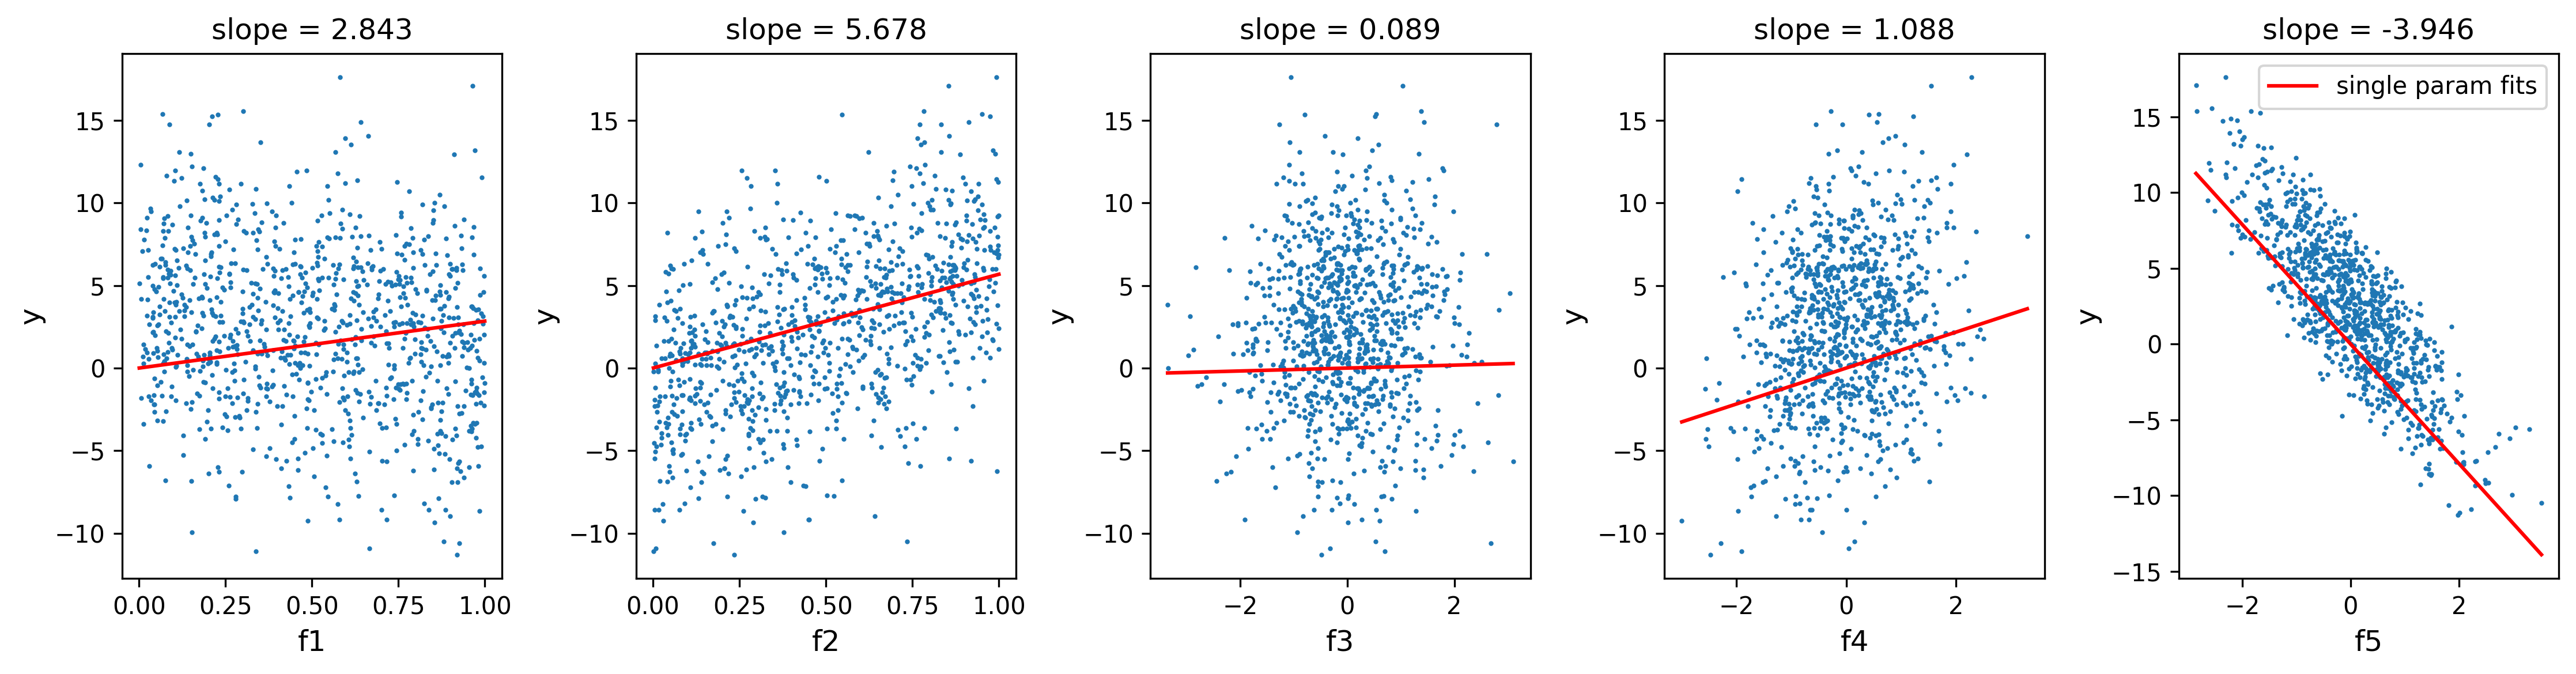

Factor loadings vector is:  [ 0.          0.          0.          0.         -3.94649148]


In [129]:
size = 1000
# factor data
f1 = np.random.rand(size)
f2 = np.random.rand(size)
f3 = np.random.normal(size=size)
f4 = np.random.normal(size=size)
f5 = np.random.normal(size=size)
f  = np.column_stack([f1,f2,f3,f4,f5])

# simulated data ("stock prices"), generated from the sum of factors and a random component
y = 0 - 3*f1 + 8*f2 + 0.1*f3 + 1*f4 - 4*f5 + np.random.randn(size) * 0.1

# visualize relations between y and each factor
fig, axes = plt.subplots(1, 5, figsize=(15,4), dpi=300)

for i in range(5):
    axes[i].scatter(f[:,i], y, s=1)
    axes[i].set_xlabel("f"+str(i+1), size=12)
    axes[i].set_ylabel("y", size=12)
    m = np.linalg.lstsq(f[:,i].reshape(-1, 1), y.reshape(-1, 1), rcond=None)[0][0][0]
    x_range = np.linspace(np.min(f[:,i]), np.max(f[:,i]), 5)
    axes[i].plot(x_range, m*x_range, "r-", label="single param fits")
    axes[i].set_title("slope = "+str(round(m,3)), size=12)
plt.tight_layout()
plt.legend()
plt.show()

# vector of 1s and 0s representing which factors you want to use for this stock
pick_vector = np.array([0,0,0,0,1])

# select corresponding indexes
pick_indexes = np.where(pick_vector==1)[0]
pick_indexes

# select out only the factors we want to use
x = pd.DataFrame(f, columns = ["f1","f2","f3","f4","f5"]).iloc[:,pick_indexes]

F_vector = np.zeros(np.shape(f)[1])
# calculate factor loadings vector and populate only non-zero factor loadings
F_vector[pick_indexes] = np.linalg.lstsq(x, y, rcond=None)[0]
print("Factor loadings vector is: ", F_vector)

In [90]:


# # Iterate over each row and set the appropriate sector column to 1
# for index, row in naics_codes.iterrows():
#     sector_code = row['sectors']
#     if sector_code == '11':
#         naics_codes.at[index, 'XLC'] = 1
#     elif sector_code == '21':
#         naics_codes.at[index, 'XLY'] = 1
#     elif sector_code == '22':
#         naics_codes.at[index, 'XLP'] = 1
#     elif sector_code == '23':
#         naics_codes.at[index, 'XLE'] = 1
#     elif sector_code == '31' or sector_code == '32' or sector_code == '33':
#         naics_codes.at[index, 'XLF'] = 1
#     elif sector_code == '42':
#         naics_codes.at[index, 'XLV'] = 1
#     elif sector_code == '44' or sector_code == '45':
#         naics_codes.at[index, 'XLI'] = 1
#     elif sector_code == '48' or sector_code == '49':
#         naics_codes.at[index, 'XLB'] = 1
#     elif sector_code == '52':
#         naics_codes.at[index, 'XLRE'] = 1
#     elif sector_code == '51':
#         naics_codes.at[index, 'XLK'] = 1
#     elif sector_code == '53':
#         naics_codes.at[index, 'XLU'] = 1
# naics_codes

/var/folders/cg/1xzg2n596716fvvpmnqdcyhh0000gn/T/ipykernel_776/1438198078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  naics_codes['sectors'] = naics_codes['naics'].astype(str).str[:2]


,datadate,tic,naics,sectors
5994,2020-07-31,A,334516,33
5995,2020-10-31,A,334516,33
5996,2021-01-31,A,334516,33
5997,2021-04-30,A,334516,33
5998,2021-07-31,A,334516,33
...,...,...,...,...
3670,2022-09-30,ZTS,325412,32
3671,2022-12-31,ZTS,325412,32
3672,2023-03-31,ZTS,325412,32
3673,2023-06-30,ZTS,325412,32


In [55]:
naics_codes[naics_codes["tic"]=="AAPL"]

,datadate,tic,naics,sectors,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU
232,2020-06-30,AAPL,334220,33,0,0,0,0,1,0,0,0,0,0,0
233,2020-09-30,AAPL,334220,33,0,0,0,0,1,0,0,0,0,0,0
234,2020-12-31,AAPL,334220,33,0,0,0,0,1,0,0,0,0,0,0
235,2021-03-31,AAPL,334220,33,0,0,0,0,1,0,0,0,0,0,0
236,2021-06-30,AAPL,334220,33,0,0,0,0,1,0,0,0,0,0,0
237,2021-09-30,AAPL,334220,33,0,0,0,0,1,0,0,0,0,0,0
238,2021-12-31,AAPL,334220,33,0,0,0,0,1,0,0,0,0,0,0
239,2022-03-31,AAPL,334220,33,0,0,0,0,1,0,0,0,0,0,0
240,2022-06-30,AAPL,334220,33,0,0,0,0,1,0,0,0,0,0,0
241,2022-09-30,AAPL,334220,33,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
size = 1000
# factor data
f1 = np.random.rand(size)
f2 = np.random.rand(size)
f3 = np.random.normal(size=size)
f4 = np.random.normal(size=size)
f5 = np.random.normal(size=size)
f  = np.column_stack([f1,f2,f3,f4,f5])

# simulated data ("stock prices"), generated from the sum of factors and a random component
y = 0 - 3*f1 + 8*f2 + 0.1*f3 + 1*f4 - 4*f5 + np.random.randn(size) * 0.1

# visualize relations between y and each factor
fig, axes = plt.subplots(1, 5, figsize=(15,4), dpi=300)

for i in range(5):
    axes[i].scatter(f[:,i], y, s=1)
    axes[i].set_xlabel("f"+str(i+1), size=12)
    axes[i].set_ylabel("y", size=12)
    m = np.linalg.lstsq(f[:,i].reshape(-1, 1), y.reshape(-1, 1), rcond=None)[0][0][0]
    x_range = np.linspace(np.min(f[:,i]), np.max(f[:,i]), 5)
    axes[i].plot(x_range, m*x_range, "r-", label="single param fits")
    axes[i].set_title("slope = "+str(round(m,3)), size=12)
plt.tight_layout()
plt.legend()
plt.show()

# vector of 1s and 0s representing which factors you want to use for this stock
pick_vector = np.array([0,0,0,0,1])

# select corresponding indexes
pick_indexes = np.where(pick_vector==1)[0]
pick_indexes

# select out only the factors we want to use
x = pd.DataFrame(f, columns = ["f1","f2","f3","f4","f5"]).iloc[:,pick_indexes]

F_vector = np.zeros(np.shape(f)[1])
# calculate factor loadings vector and populate only non-zero factor loadings
F_vector[pick_indexes] = np.linalg.lstsq(x, y, rcond=None)[0]
print("Factor loadings vector is: ", F_vector)

In [8]:
stock_returns.head(3)

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-01 00:00:00,-0.066497,-0.290239,-0.116797,0.072180,-0.112266,-0.084466,-0.116572,-0.017144,-0.006378,-0.158847,...,-0.144103,-0.099292,-0.171925,-0.120714,-0.052902,-0.156188,-0.079446,-0.117354,-0.121785,-0.005867
2020-03-01 00:00:00,-0.070715,-0.357740,-0.067554,-0.111072,0.024406,-0.296067,-0.095963,-0.077886,-0.173438,-0.058253,...,-0.437904,-0.032413,-0.251261,-0.211413,-0.155270,-0.228716,-0.257583,-0.129734,-0.325205,-0.116640
2020-04-01 00:00:00,0.073096,-0.014766,0.155374,0.078882,0.167025,-0.155657,0.134326,0.111237,0.222532,0.055714,...,0.421000,0.060890,0.223861,0.096101,0.103946,0.261200,0.187153,0.250871,0.181241,0.098734


In [5]:
factor_returns.head(3)

,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2020-02-01,-0.085199,-0.058431,-0.152882,-0.112483,-0.099001,-0.073009,-0.082146,-0.062198,-0.098579,-0.065867,-0.075726
2020-03-01,-0.145675,-0.128448,-0.358074,-0.216999,-0.192529,-0.090529,-0.060700,-0.157379,-0.108877,-0.043516,-0.153242
2020-04-01,0.159561,0.139730,0.336900,0.103902,0.096569,0.143304,0.075705,0.102392,0.043733,0.131339,0.194594


In [9]:
N_S = stock_returns.shape[1]

# Estimate factor weights using a linear regression model
# factor loadings
# https://www.utstat.toronto.edu/~brunner/oldclass/431s11/handouts/FactorAnalysis1.pdf
# https://online.stat.psu.edu/stat505/book/export/html/691
F = np.linalg.lstsq(factor_returns.values, stock_returns.values, rcond=None)[0]
print("Calculated F with shape", np.shape(F))

# Factor covariance matrix (A)
A = np.cov(factor_returns, rowvar=False)
print("Calculated A with shape", np.shape(A))

# Matrix B = F^-1 * A * F
# factor weights inverse
# Moore-Penrose pseudo-inverse, need to check this
F_inv = np.linalg.pinv(F)
print("Calculated F^-1 with shape", np.shape(F_inv))
B = F_inv @ A @ F
print("Calculated B with shape", np.shape(B))

# Matrix PSI (diagonal matrix with standard deviations of stock returns)
PSI = np.diag(stock_returns.std())**2
print("\nCalculated PSI with shape", np.shape(PSI))

# Implied variance-covariance matrix
SIGMA = B + PSI

print("\nImplied Variance-Covariance Matrix:")
print(SIGMA)

Calculated F with shape (11, 495)
Calculated A with shape (11, 11)
Calculated F^-1 with shape (495, 11)
Calculated B with shape (495, 495)

Calculated PSI with shape (495, 495)

Implied Variance-Covariance Matrix:
[[ 6.79083216e-03  5.76922273e-05  4.91055183e-05 ...  7.07113057e-05
   4.99155376e-05  4.91853482e-05]
 [-8.46885971e-06  2.02084726e-02 -9.03472023e-06 ... -1.38483570e-06
   1.08158932e-05 -3.79903222e-06]
 [ 1.91143309e-04  2.49716743e-04  8.42019503e-03 ...  3.16983776e-04
   1.89407648e-04  1.71276028e-04]
 ...
 [ 8.33011046e-05  1.09655050e-04  1.10357585e-04 ...  1.64911107e-02
   8.14522796e-05  8.28767573e-05]
 [ 4.94841411e-05  1.09362735e-04  2.77987938e-05 ...  8.68486819e-05
   1.78039991e-02  2.95927708e-05]
 [ 4.26818502e-05  2.03679395e-05  4.94936722e-05 ...  5.06411024e-05
   1.60578803e-06  5.43552754e-03]]


array([1.00266548, 1.98527422])

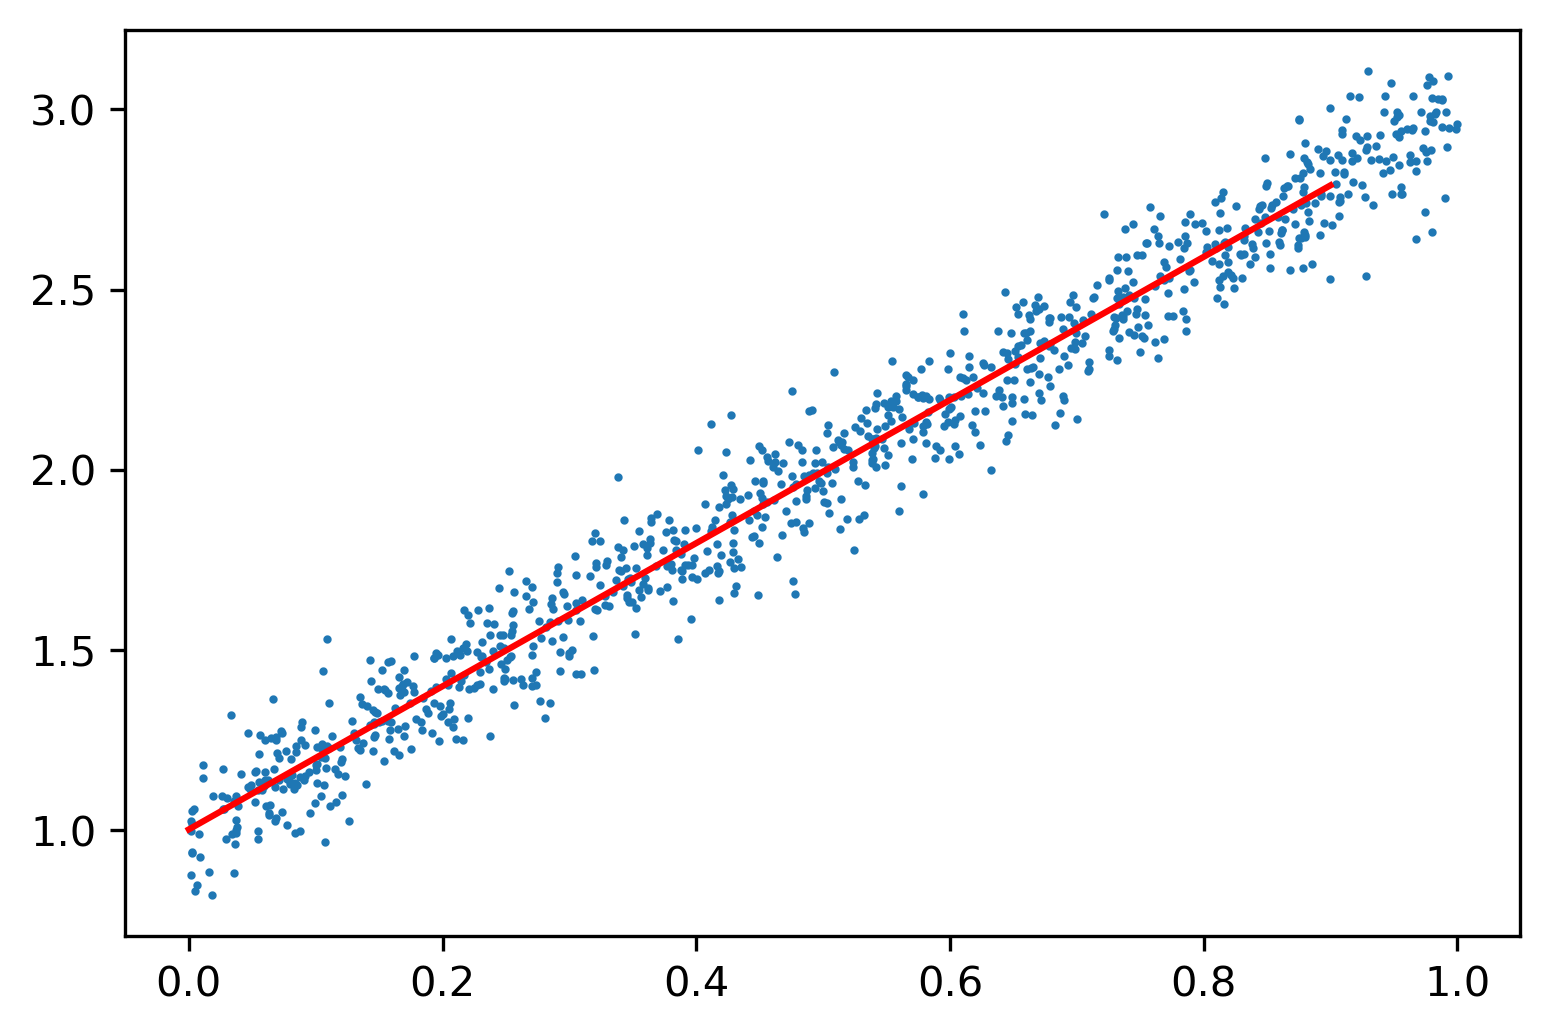

In [122]:
np.cov(x,y)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 300 and the array at index 1 has size 47

In [131]:
np.cov(stock_returns[stock], factor_returns["XLB"])

array([[0.00816953, 0.00379702],
       [0.00379702, 0.00483399]])

XLB    0.82185
dtype: float64 

 const    0.014266
XLB      0.785482
dtype: float64 

 0.8025581613543662 

 0.6060360777058279 

 0.6173492896160144


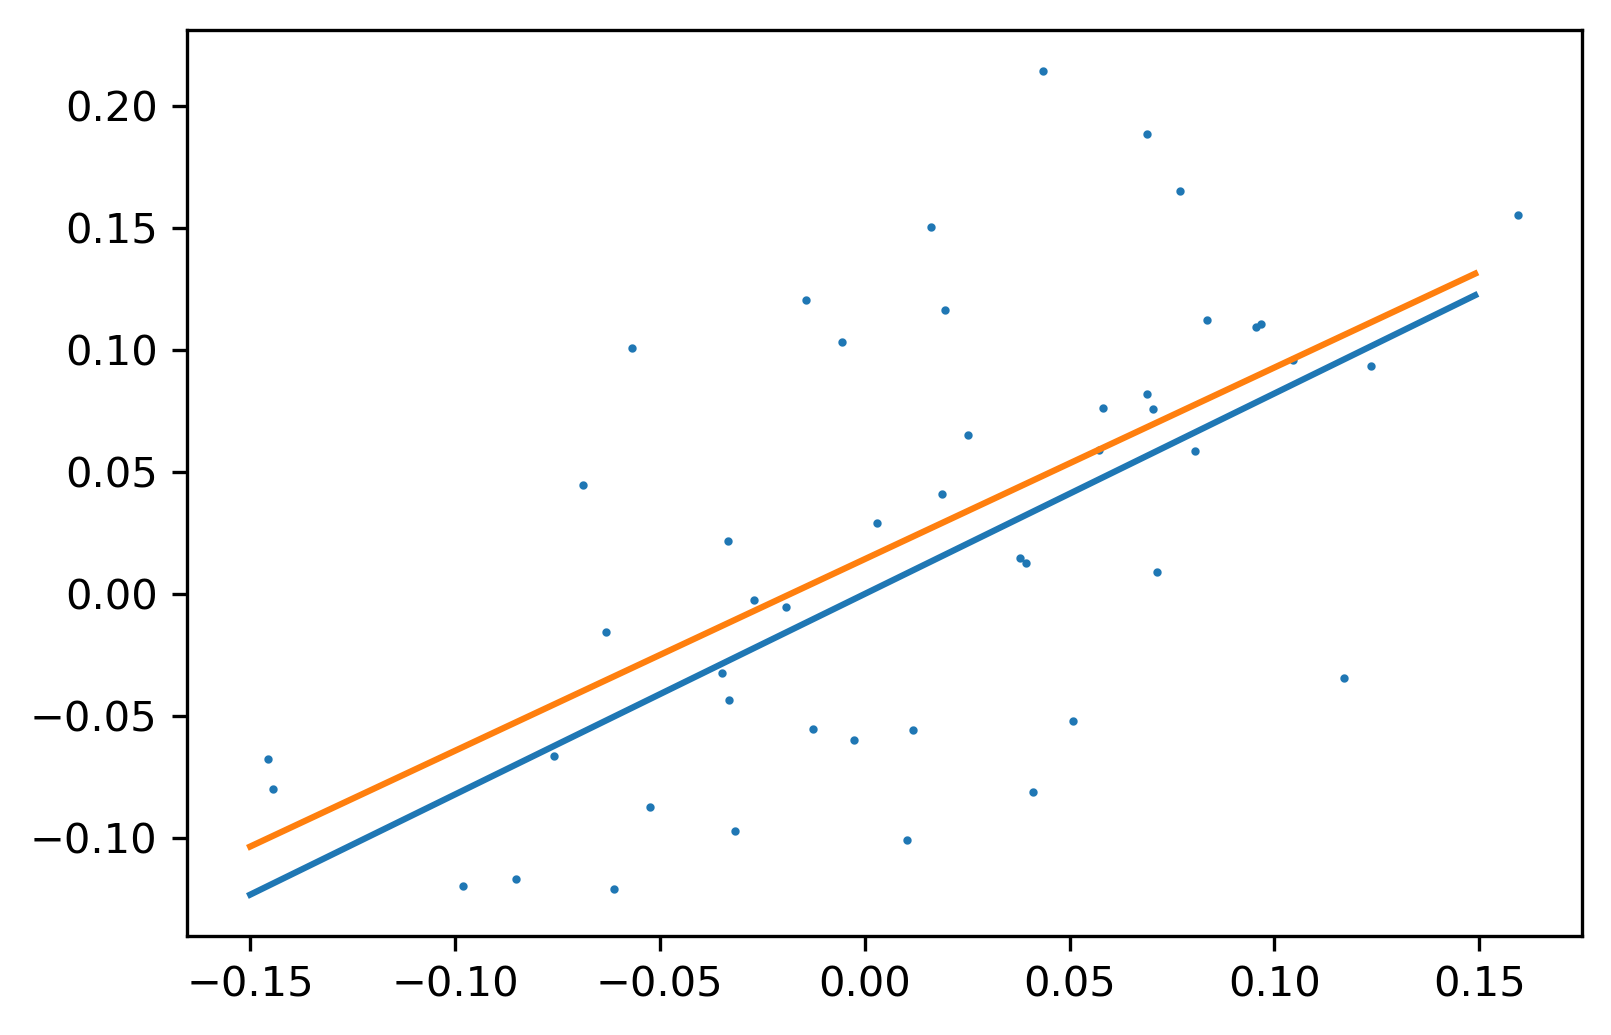

In [145]:
import statsmodels.api as sm

stock = "AAPL"
factor = "XLB"

y = stock_returns[stock]
x = factor_returns[factor]
model = sm.OLS(y, x).fit()

x_with_intercept = sm.add_constant(factor_returns[factor])
model_with_intercept = sm.OLS(y, x_with_intercept).fit()

plt.figure(dpi=300)
plt.scatter(factor_returns[factor], stock_returns[stock], s=1)

m = model.params[0]
x_plot = np.arange(-0.15,0.15,0.001)
plt.plot(x_plot, m*(x_plot), label="without intercept")

m = model_with_intercept.params[1]
c = model_with_intercept.params[0]
x_plot = np.arange(-0.15,0.15,0.001)
plt.plot(x_plot, m*(x_plot)+c, label="with intercept")

m_calculated = np.cov(x,y)[0,1] / np.var(x)
corr, p_value = spearmanr(factor_returns[factor],stock_returns["AAPL"])

print(model.params, "\n\n", 
      model_with_intercept.params, "\n\n", 
      m_calculated, "\n\n", 
      corr, "\n\n",
      np.cov(x,y)[0,1]/np.sqrt(np.var(x)*np.var(y)))

In [108]:
factor_loadings = pd.DataFrame(index=stock_returns.columns, columns=factor_returns.columns)


# x = sm.add_constant(factor_returns["XLK"])
# for stock in stock_returns.columns:
#     print(stock)
    # Extract the stock's returns and add a constant term for the intercept
# x = sm.add_constant(stock_returns[stock])
# y["const"] = y["const"] - 0
    # Perform linear regression with factor returns as independent variables

    # Extract the factor loadings (coefficients) from the regression results
#     print(factor_loadings.loc[stock])
#     print(model.params[1:])
# factor_loadings.loc[stock] = model.params[0]


XLK    1.146765
dtype: float64

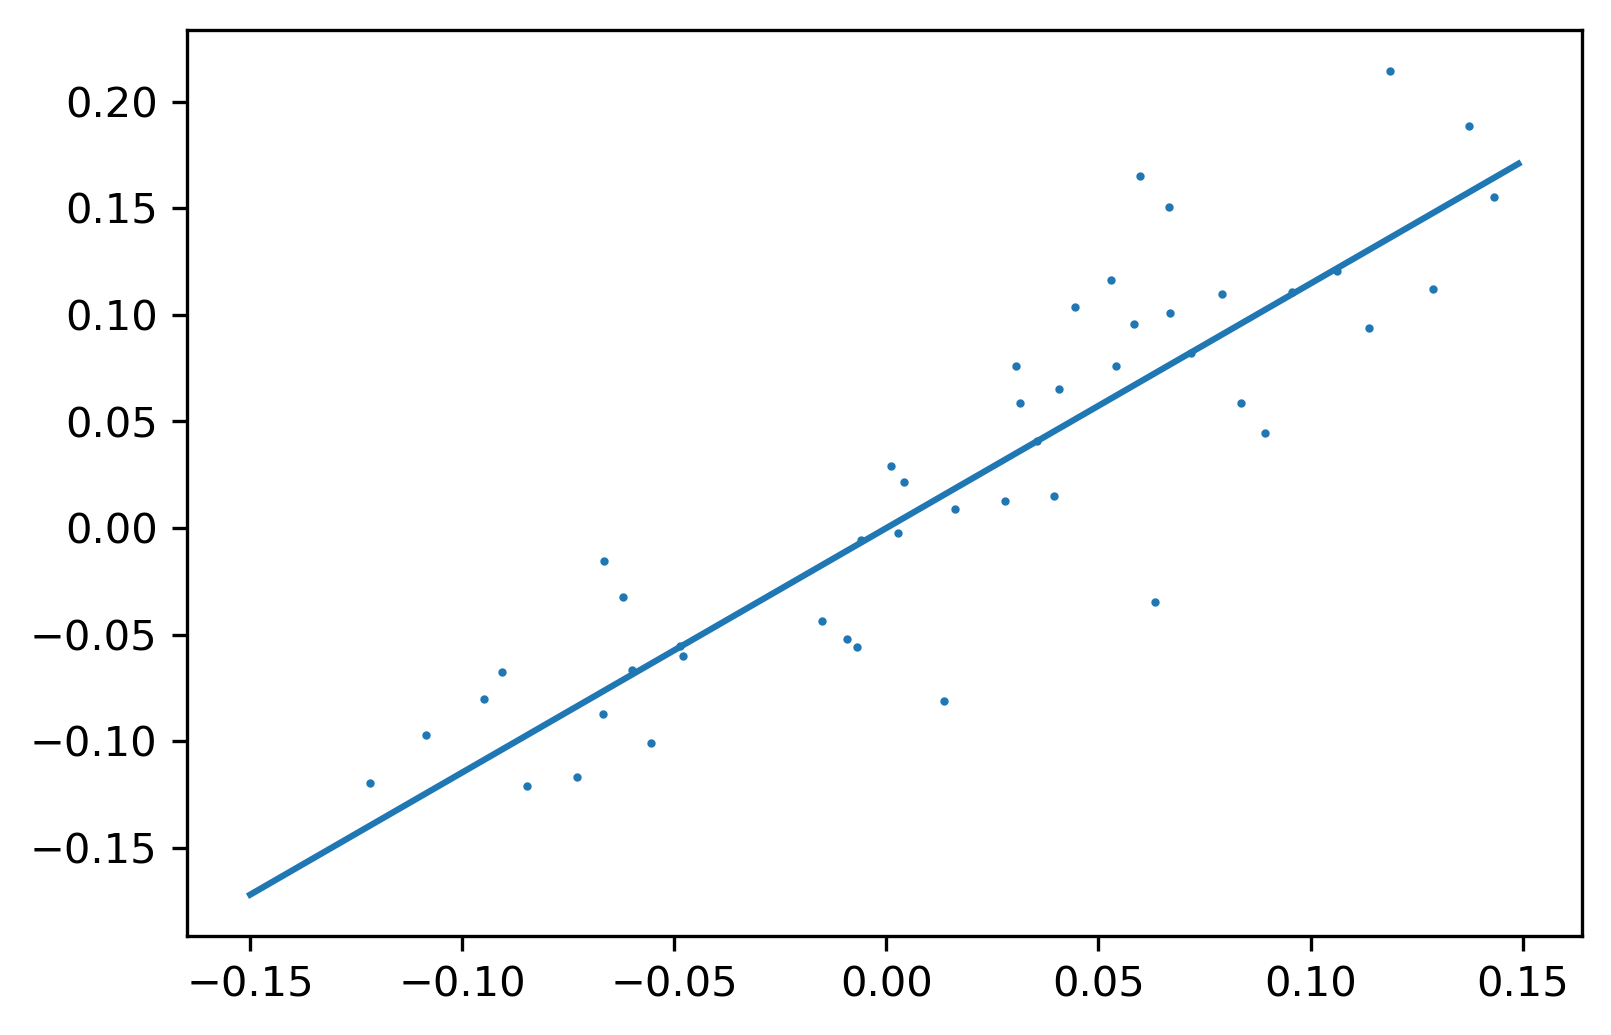

In [109]:
plt.figure(dpi=300)
plt.scatter(factor_returns["XLK"], stock_returns[stock], s=1)
# c = model.params.loc["XLB"][0]
# m = model.params.loc["XLB"][1]
# c = model.params[0]
# m = model.params[1]

m = model.params[0]
x = np.arange(-0.15,0.15,0.001)
plt.plot(x, m*(x))
# plt.title("Lagged MOI % V.S. RMI %")
# plt.xlabel("RMI %")
# plt.ylabel("MOI %, Lagged by "+str(max_lag)+" mon")
plt.show()

In [16]:
np.cov(factor_returns["XLB"],stock_returns["AAPL"])

array([[0.00483399, 0.00379702],
       [0.00379702, 0.00816953]])

In [102]:

corr, p_value = spearmanr(factor_returns["XLK"],stock_returns["AAPL"])
print("Correlation is", corr, "\np-value is", p_value)


corr * np.std(stock_returns["AAPL"]) / np.std(factor_returns["XLK"])

Correlation is 0.8938482886216467 
p-value is 2.7732274492929997e-17


1.1416813132608452

In [178]:
np.sum(model.params[1]**2)

3.324595361059564

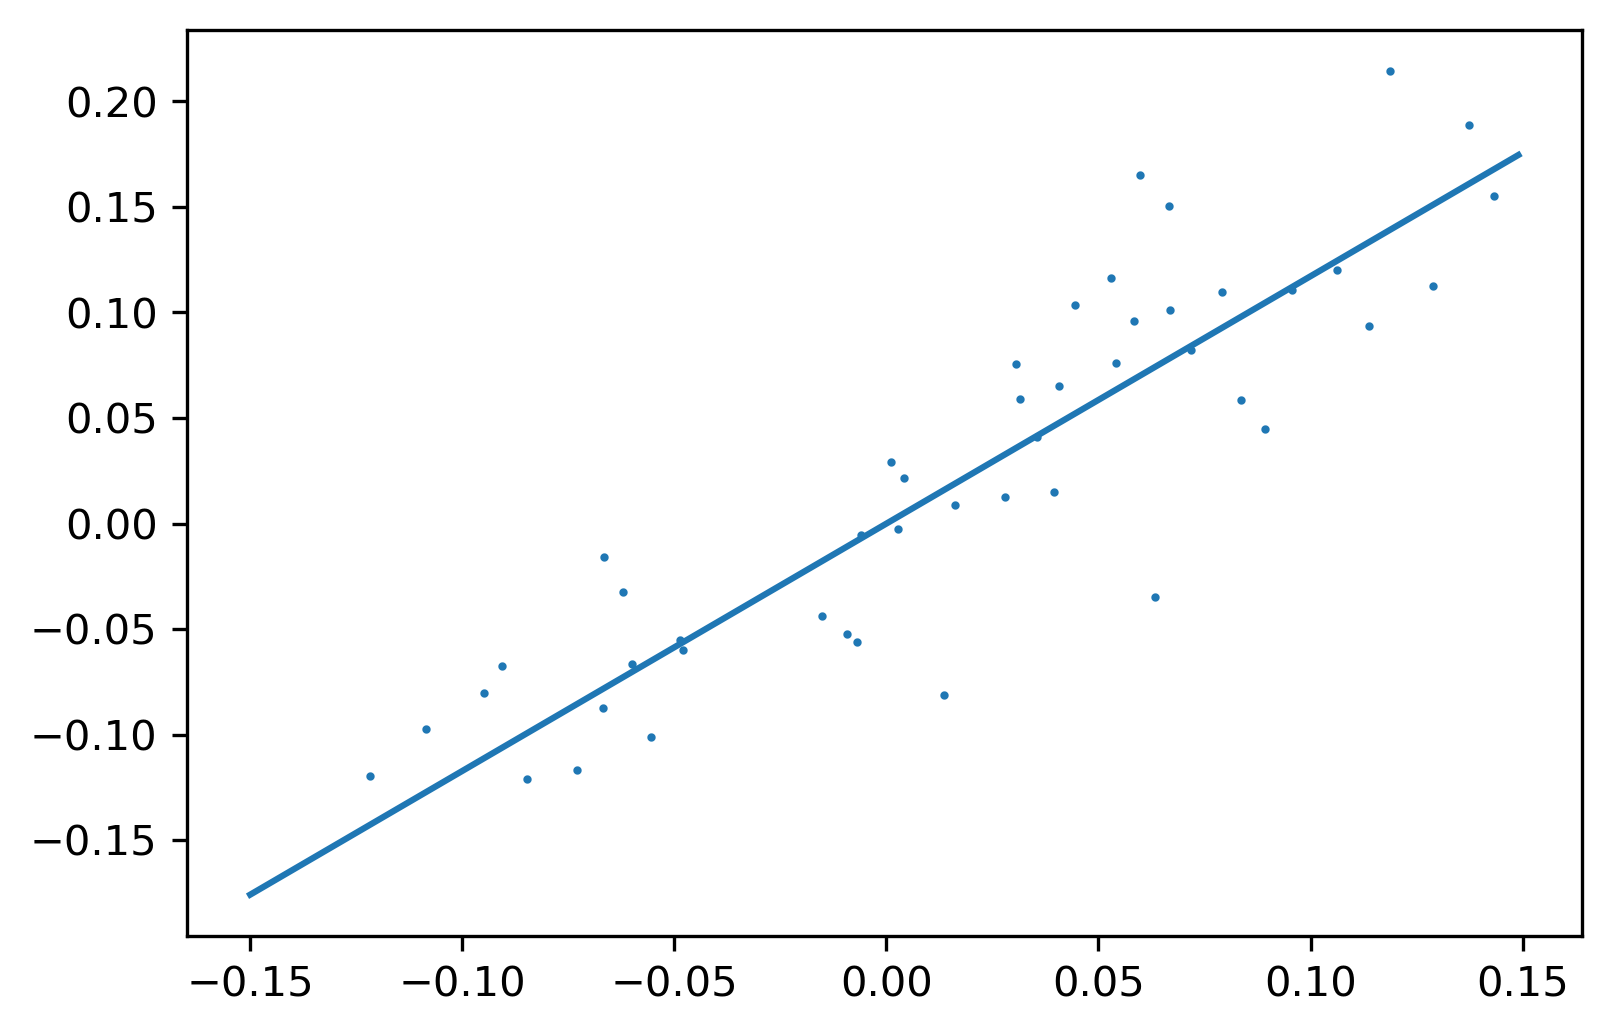

In [146]:
model.params

,0,1
XLB,8.608518,-0.254167
XLC,-4.707864,-0.235298
XLE,1.050743,-0.022599
XLF,-0.214288,0.154317
XLI,-4.009572,-0.530743
XLK,12.024896,1.171804
XLP,-3.548012,1.016797
XLRE,-4.316128,-0.390500
XLU,-1.094903,0.043139
XLV,2.864723,-0.108388


In [125]:
AAPL_id = stock_returns.columns.get_loc("AAPL")
pd.DataFrame([F[:,AAPL_id]], columns=sector_etfs_tickers, index=["AAPL"])

,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU
AAPL,-0.254167,-0.235298,-0.022599,0.154317,-0.530743,1.171804,1.016797,-0.3905,0.043139,-0.108388,0.57054


In [131]:
factor_loadings.loc["AAPL"]

XLB      8.608518
XLC     -4.707864
XLE      1.050743
XLF     -0.214288
XLI     -4.009572
XLK     12.024896
XLP     -3.548012
XLRE    -4.316128
XLU     -1.094903
XLV      2.864723
XLY     -5.466543
Name: AAPL, dtype: object

In [88]:
pd.DataFrame(np.swapaxes(F, 0, 1), columns=sector_etfs_tickers, index=stock_returns.columns).loc["AAPL"]

XLC    -0.254167
XLY    -0.235298
XLP    -0.022599
XLE     0.154317
XLF    -0.530743
XLV     1.171804
XLI     1.016797
XLB    -0.390500
XLRE    0.043139
XLK    -0.108388
XLU     0.570540
Name: AAPL, dtype: float64

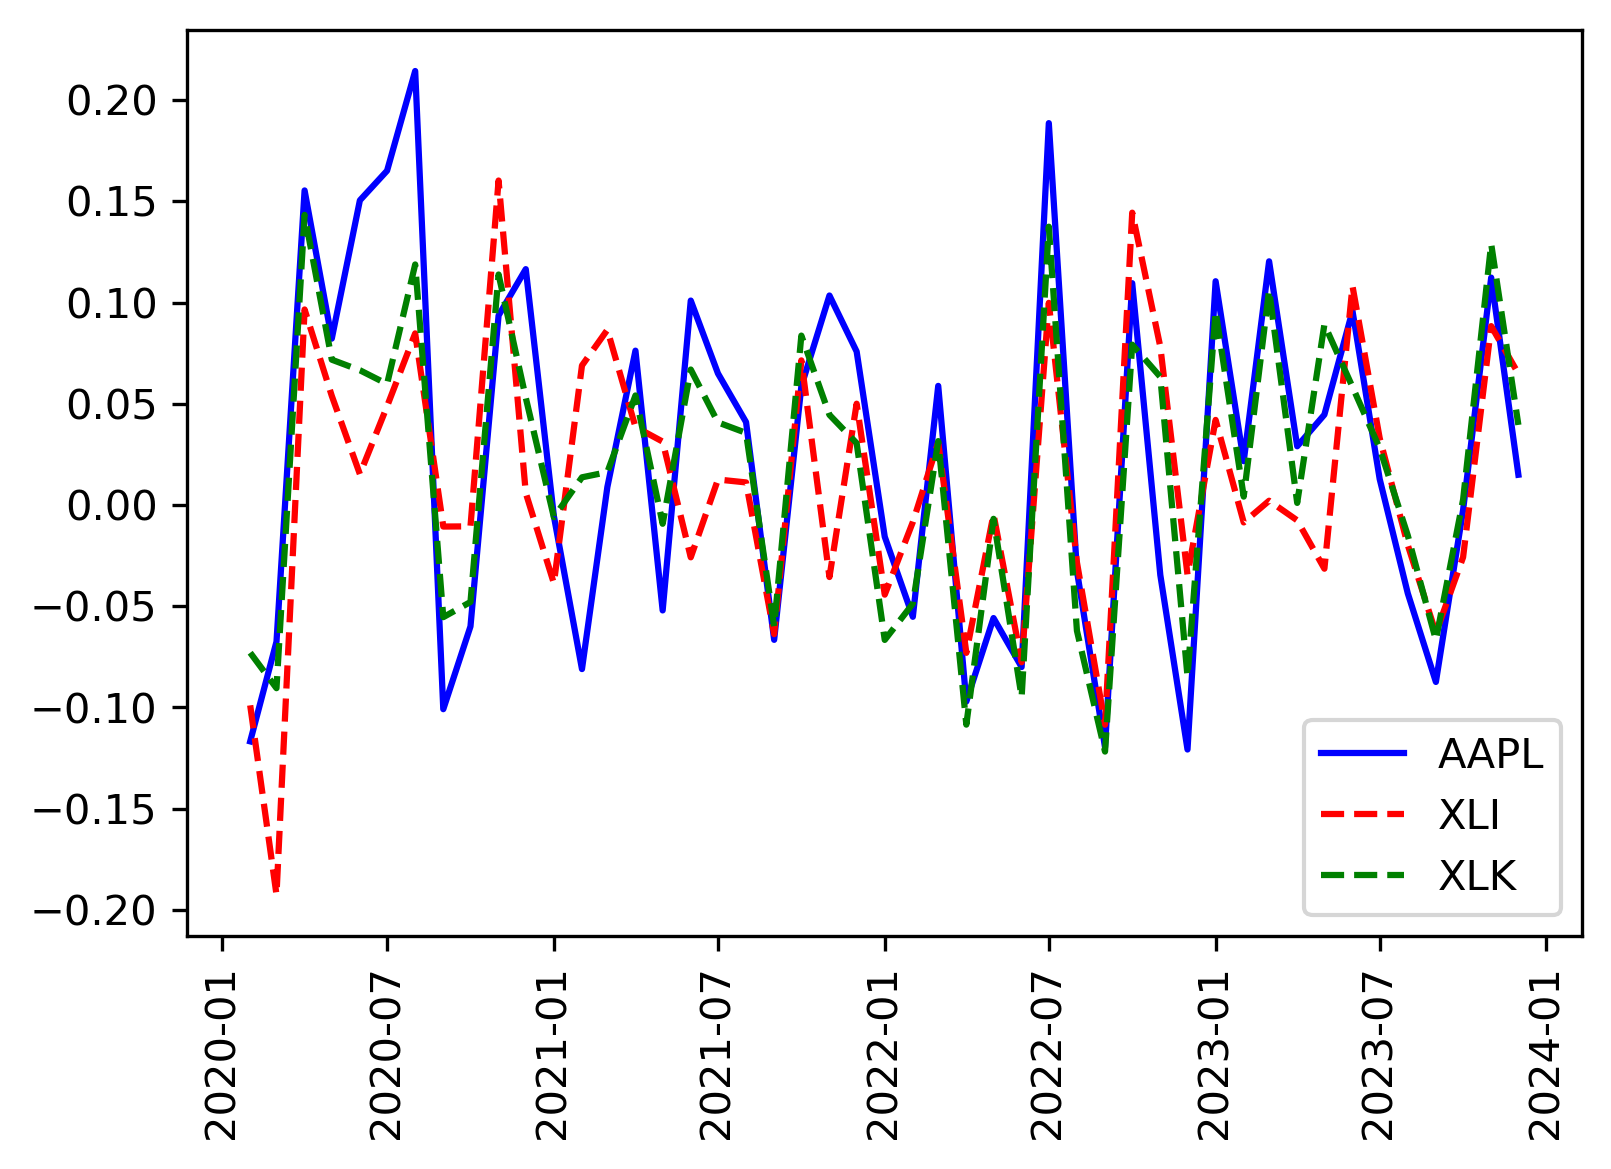

Correlation is 0.8938482886216467 
p-value is 2.7732274492929997e-17


In [97]:
plt.figure(dpi=300)

plt.plot(stock_returns["AAPL"], "b", label="AAPL")
plt.plot(factor_returns["XLI"],"--r", label="XLI")
plt.plot(factor_returns["XLK"],"--g", label="XLK")

plt.xticks(rotation=90) 
plt.legend()
plt.show()

from scipy.stats import spearmanr

corr, p_value = spearmanr(factor_returns["XLK"],stock_returns["AAPL"])
print("Correlation is", corr, "\np-value is", p_value)

In [59]:
F[:,1]

array([ 0.61404974, -0.35819913,  0.10223779,  0.25031937,  1.42307028,
        0.26335428, -0.20937399,  0.74974917, -0.99231128, -1.29997759,
       -0.25660366])

In [8]:
# Calculating the inverse using np.linalg.inv()
print("Using np.linalg.inv():")
print(np.linalg.inv(SIGMA))

Using np.linalg.inv():
[[ 1.48202370e+02 -4.87731416e-02 -9.78494063e-02 ... -8.39922229e-02
  -6.00292033e-02 -3.68116156e-01]
 [ 1.36534155e-02  4.94762625e+01  1.13377237e-02 ... -1.95245998e-02
  -3.76364239e-02 -1.61651585e-02]
 [-6.04357416e-01 -2.84999689e-01  1.21250533e+02 ... -5.56711794e-01
  -1.48347163e-01 -8.61759269e-01]
 ...
 [-1.45174072e-01 -7.54476681e-02 -2.56399087e-01 ...  6.10249719e+01
  -4.45034480e-02 -2.70177698e-01]
 [-7.16704162e-02 -1.14785791e-01  6.58226155e-02 ... -6.99679188e-02
   5.63758085e+01 -1.16096748e-02]
 [-4.18504051e-01  1.40951698e-02 -3.77743016e-01 ... -1.54612268e-01
   1.10645612e-01  1.84943002e+02]]


In [55]:
# Calculating the inverse of SIGMA by splitting B into N_S matrices
C = PSI.copy()
C_inv = np.diag(1/np.diagonal(C))
for i in range(0,N_S):
    B_i = np.zeros_like(B)
    B_i[i,:] = B[i,:]
    # vvvv they have a typo in the worksheet, the line below is false:
    #                  vvvvv this is not just the trace
    # C_inv = C_inv - np.trace(B_i @ C_inv) * C_inv @ B_i @ C_inv
    C_inv = C_inv - 1/(1+np.trace(B_i @ C_inv)) * C_inv @ B_i @ C_inv

print("Splitting into N_S matrices:")
print(C_inv)

Splitting into N_S matrices:
[[ 1.48202402e+02 -4.87733580e-02 -9.78501864e-02 ... -8.39927661e-02
  -6.00297182e-02 -3.68117294e-01]
 [ 1.36535108e-02  4.94762626e+01  1.13375084e-02 ... -1.95246541e-02
  -3.76363347e-02 -1.61649548e-02]
 [-6.04356865e-01 -2.84999884e-01  1.21250597e+02 ... -5.56710768e-01
  -1.48346675e-01 -8.61757837e-01]
 ...
 [-1.45173731e-01 -7.54476120e-02 -2.56398060e-01 ...  6.10249724e+01
  -4.45034341e-02 -2.70177109e-01]
 [-7.16706579e-02 -1.14785422e-01  6.58230173e-02 ... -6.99677327e-02
   5.63758124e+01 -1.16097062e-02]
 [-4.18503815e-01  1.40954066e-02 -3.77742245e-01 ... -1.54611768e-01
   1.10645468e-01  1.84943030e+02]]
